# Comparing the variance on different movies

## Setup

In [11]:
from amftrack.util.sys import storage_path
from amftrack.util.plot import extract_kymograth, variance_over_time_on_segment, show_image, show_image_with_segment
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

from skimage.measure import profile_line
#%matplotlib notebook

### Defining the region

In [2]:
image_path = os.path.join(storage_path, "width2/variation_analysis/20220324_Plate907_054/Img/Basler_acA4112-30um__40044625__20220324_131604024_0001.tiff")

In [3]:
im = image.imread(image_path)
print(im.shape)

(3000, 4096)


In [4]:
x1, y1 = 2200, 1650
x2, y2 = 2200, 2300

In [5]:
np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2]))

650.0

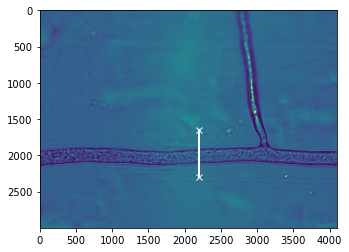

In [13]:
show_image_with_segment(image_path, x1, y1, x2, y2)

### Extract profile

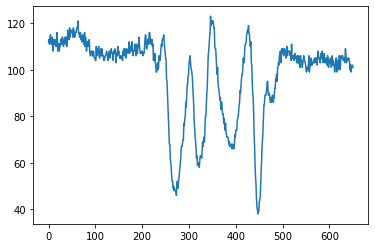

In [7]:
profile = profile_line(im, src = [y1, x1], dst = [y2, x2], linewidth = 1) # careful with (y, x) and not (x, y)
plt.plot(list(range(len(profile))), profile)

In [8]:
profile.shape

(651,)

## Debug

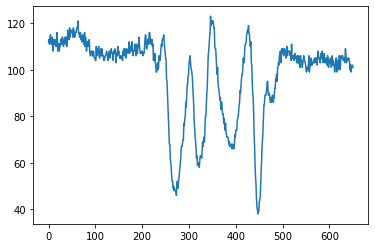

In [9]:
plt.plot(list(range(len(profile))), profile)
plt.show()

## Extraction from different movies

In [10]:
movies = ['movie_054_0', 'movie_054_1', 'movie_054_2', '20220324_Plate907_054/Img']
movie_path = [os.path.join(os.path.join(storage_path, "width2/variation_analysis/"), movies[i]) for i in range(len(movies))]

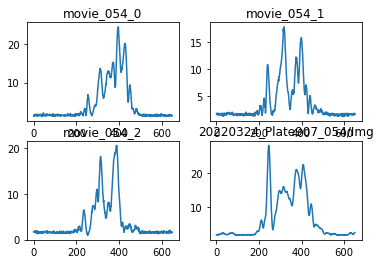

In [19]:
l = []
for i, path in enumerate(movie_path):
    variance_on_segment = variance_over_time_on_segment(path, x1, y1, x2, y2)
    l.append(variance_on_segment)
    plt.subplot(2,2,i+1)
    plt.plot(variance_on_segment)
    plt.title(movies[i])

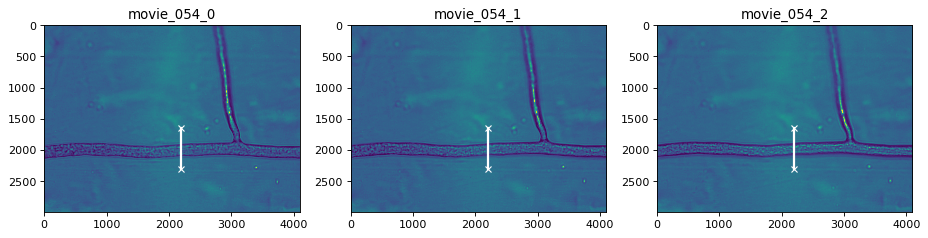

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(14, 8), dpi=80)

for i in range(len(movie_path)-1):
    plt.subplot(1,3,i+1)
    image_path = os.path.join(movie_path[i], os.listdir(movie_path[i])[0])
    show_image_with_segment(image_path, x1, y1, x2, y2)
    plt.title(movies[i])

In [25]:
print(len(l))
print(len(l[0]))

4
651


## Trying different filters

### First try

Paramètres: 5, 3 très bien

In [ ]:
from scipy.signal import savgol_filter

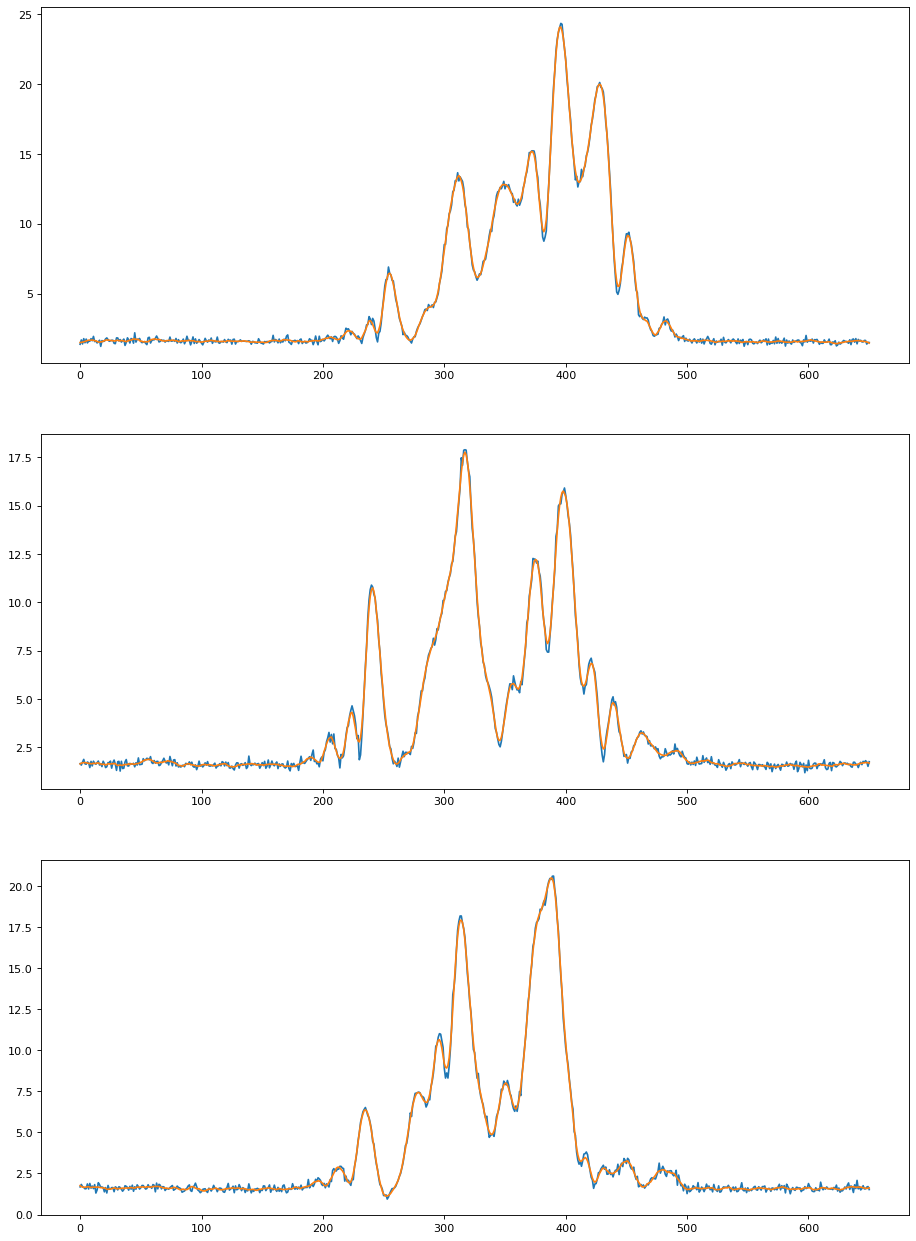

In [39]:
np.set_printoptions(precision=2)  # For compact display.
plt.figure(figsize=(14, 20), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(l[i])
    new = savgol_filter(l[i], window_length= 15, polyorder=3)
    plt.plot(new)

### Trying sets of parameters

In [49]:
params = {'w': [50, 100, 200], 'p': [3, 3, 3]}

In [52]:
result = []

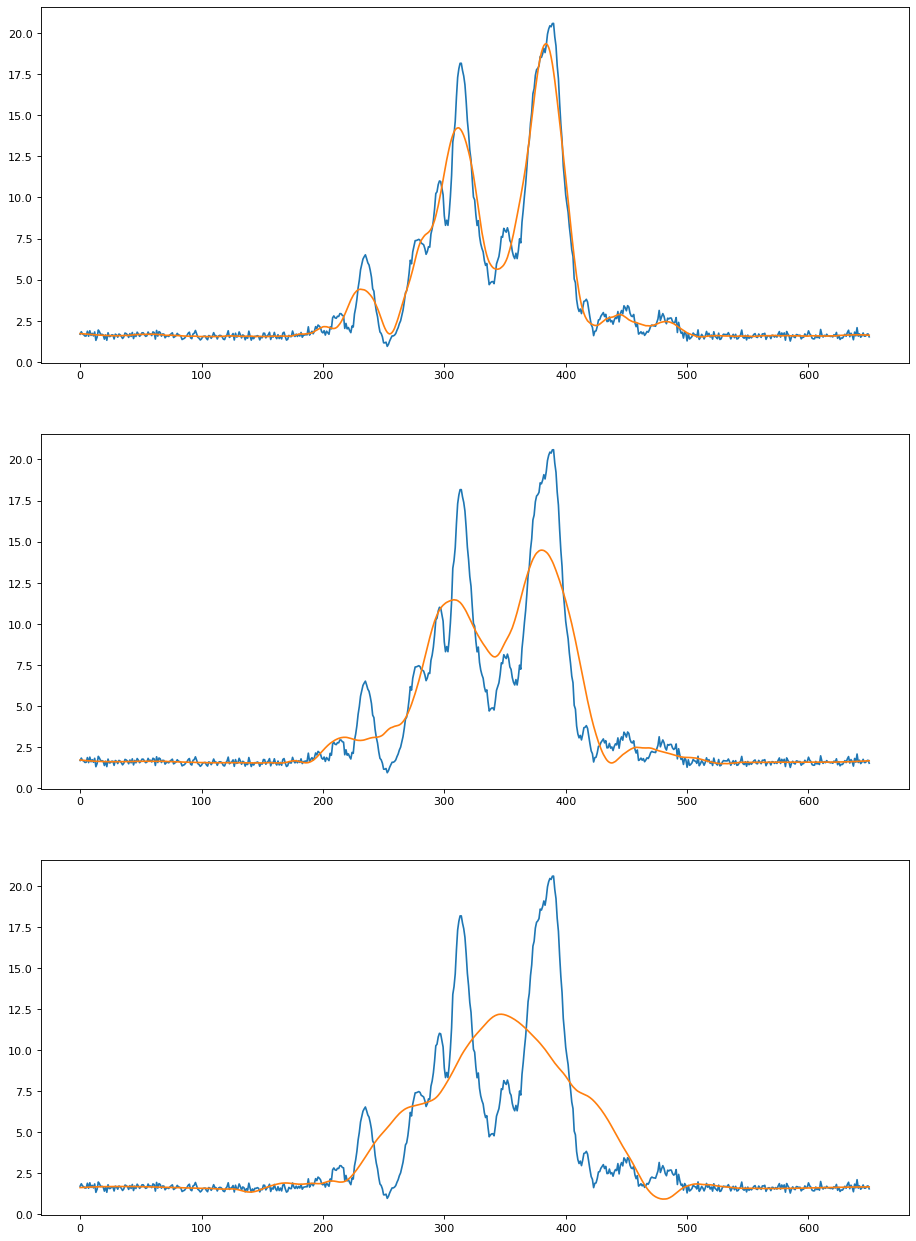

In [53]:
np.set_printoptions(precision=2)  # For compact display.
plt.figure(figsize=(14, 20), dpi=80)
j = 2
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(l[j])
    new = savgol_filter(l[j], window_length= params['w'][i], polyorder=params['p'][i])
    result.append(new)
    plt.plot(new)

### Effet seuil

In [60]:
seuil = [result[i]>3.0 for i in range(len(result))]

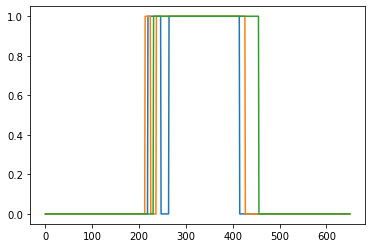

In [61]:
for i in range(len(seuil)):
    plt.plot(seuil[i])